In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


df=pd.read_csv('/kaggle/input/output-dataset/output.csv');

In [27]:
df

,Time,Sample,dataset,delimiter,SID,sample_count,sample_rate_hz,start_time,latitude_deg,longitude_deg,...,depth_m,azimuth_deg,dip_deg,instrument,geodetic_datum,field_unit,field_type,scale_factor,scale_frequency_hz,scale_units
0,2019-01-12T04:59:59.698000Z,5443060,GeoCSV 2.0,",",XB_ELYSE_10_LMU,1250,1.0,2019-01-12T04:59:59.698000Z,4.502384,135.623447,...,-0.1,135.1,-29.4,VBB Pos ENG,"Mars 2000 planetocentric, MOLA geoid","UTC, Counts","datetime, INTEGER",9.454070e+08,0.005,m/s**2
1,2019-01-12T05:00:00.698000Z,5442664,GeoCSV 2.0,",",XB_ELYSE_10_LMU,1250,1.0,2019-01-12T04:59:59.698000Z,4.502384,135.623447,...,-0.1,135.1,-29.4,VBB Pos ENG,"Mars 2000 planetocentric, MOLA geoid","UTC, Counts","datetime, INTEGER",9.454070e+08,0.005,m/s**2
2,2019-01-12T05:00:01.698000Z,5442460,GeoCSV 2.0,",",XB_ELYSE_10_LMU,1250,1.0,2019-01-12T04:59:59.698000Z,4.502384,135.623447,...,-0.1,135.1,-29.4,VBB Pos ENG,"Mars 2000 planetocentric, MOLA geoid","UTC, Counts","datetime, INTEGER",9.454070e+08,0.005,m/s**2
3,2019-01-12T05:00:02.698000Z,5442096,GeoCSV 2.0,",",XB_ELYSE_10_LMU,1250,1.0,2019-01-12T04:59:59.698000Z,4.502384,135.623447,...,-0.1,135.1,-29.4,VBB Pos ENG,"Mars 2000 planetocentric, MOLA geoid","UTC, Counts","datetime, INTEGER",9.454070e+08,0.005,m/s**2
4,2019-01-12T05:00:03.698000Z,5441764,GeoCSV 2.0,",",XB_ELYSE_10_LMU,1250,1.0,2019-01-12T04:59:59.698000Z,4.502384,135.623447,...,-0.1,135.1,-29.4,VBB Pos ENG,"Mars 2000 planetocentric, MOLA geoid","UTC, Counts","datetime, INTEGER",9.454070e+08,0.005,m/s**2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168128,2019-01-12T05:20:46.768000Z,-7216,GeoCSV 2.0,",",XB_ELYSE_67_MHW,2500,2.0,2019-01-12T04:59:59.268000Z,4.502384,135.623447,...,-0.1,350.0,-0.8,SP velocity,"Mars 2000 planetocentric, MOLA geoid","UTC, Counts","datetime, INTEGER",2.137420e+10,0.100,m/s
168129,2019-01-12T05:20:47.268000Z,-7257,GeoCSV 2.0,",",XB_ELYSE_67_MHW,2500,2.0,2019-01-12T04:59:59.268000Z,4.502384,135.623447,...,-0.1,350.0,-0.8,SP velocity,"Mars 2000 planetocentric, MOLA geoid","UTC, Counts","datetime, INTEGER",2.137420e+10,0.100,m/s
168130,2019-01-12T05:20:47.768000Z,-7275,GeoCSV 2.0,",",XB_ELYSE_67_MHW,2500,2.0,2019-01-12T04:59:59.268000Z,4.502384,135.623447,...,-0.1,350.0,-0.8,SP velocity,"Mars 2000 planetocentric, MOLA geoid","UTC, Counts","datetime, INTEGER",2.137420e+10,0.100,m/s
168131,2019-01-12T05:20:48.268000Z,-7294,GeoCSV 2.0,",",XB_ELYSE_67_MHW,2500,2.0,2019-01-12T04:59:59.268000Z,4.502384,135.623447,...,-0.1,350.0,-0.8,SP velocity,"Mars 2000 planetocentric, MOLA geoid","UTC, Counts","datetime, INTEGER",2.137420e+10,0.100,m/s


In [28]:
#dropping the useless column
df=df[['Sample', 'sample_rate_hz', 'latitude_deg', 'longitude_deg', 'elevation_m', 'depth_m', 'azimuth_deg', 'dip_deg', 'scale_factor', 'scale_frequency_hz', 'scale_units']]
df

,Sample,sample_rate_hz,latitude_deg,longitude_deg,elevation_m,depth_m,azimuth_deg,dip_deg,scale_factor,scale_frequency_hz,scale_units
0,5443060,1.0,4.502384,135.623447,-2613.4,-0.1,135.1,-29.4,9.454070e+08,0.005,m/s**2
1,5442664,1.0,4.502384,135.623447,-2613.4,-0.1,135.1,-29.4,9.454070e+08,0.005,m/s**2
2,5442460,1.0,4.502384,135.623447,-2613.4,-0.1,135.1,-29.4,9.454070e+08,0.005,m/s**2
3,5442096,1.0,4.502384,135.623447,-2613.4,-0.1,135.1,-29.4,9.454070e+08,0.005,m/s**2
4,5441764,1.0,4.502384,135.623447,-2613.4,-0.1,135.1,-29.4,9.454070e+08,0.005,m/s**2
...,...,...,...,...,...,...,...,...,...,...,...
168128,-7216,2.0,4.502384,135.623447,-2613.4,-0.1,350.0,-0.8,2.137420e+10,0.100,m/s
168129,-7257,2.0,4.502384,135.623447,-2613.4,-0.1,350.0,-0.8,2.137420e+10,0.100,m/s
168130,-7275,2.0,4.502384,135.623447,-2613.4,-0.1,350.0,-0.8,2.137420e+10,0.100,m/s
168131,-7294,2.0,4.502384,135.623447,-2613.4,-0.1,350.0,-0.8,2.137420e+10,0.100,m/s


In [29]:
print(df['scale_units'].unique())


['m/s**2' 'm/s']


In [30]:
#converting textual scale unit to numbers
scale_unit_mapping = {
    'm/s**2': 1,  
    'm/s': 2,     

}

df['scale_units'] = df['scale_units'].map(scale_unit_mapping)

print(df[['scale_units']].head())

   scale_units
0            1
1            1
2            1
3            1
4            1


/tmp/ipykernel_30/204667984.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scale_units'] = df['scale_units'].map(scale_unit_mapping)


In [31]:
df

,Sample,sample_rate_hz,latitude_deg,longitude_deg,elevation_m,depth_m,azimuth_deg,dip_deg,scale_factor,scale_frequency_hz,scale_units
0,5443060,1.0,4.502384,135.623447,-2613.4,-0.1,135.1,-29.4,9.454070e+08,0.005,1
1,5442664,1.0,4.502384,135.623447,-2613.4,-0.1,135.1,-29.4,9.454070e+08,0.005,1
2,5442460,1.0,4.502384,135.623447,-2613.4,-0.1,135.1,-29.4,9.454070e+08,0.005,1
3,5442096,1.0,4.502384,135.623447,-2613.4,-0.1,135.1,-29.4,9.454070e+08,0.005,1
4,5441764,1.0,4.502384,135.623447,-2613.4,-0.1,135.1,-29.4,9.454070e+08,0.005,1
...,...,...,...,...,...,...,...,...,...,...,...
168128,-7216,2.0,4.502384,135.623447,-2613.4,-0.1,350.0,-0.8,2.137420e+10,0.100,2
168129,-7257,2.0,4.502384,135.623447,-2613.4,-0.1,350.0,-0.8,2.137420e+10,0.100,2
168130,-7275,2.0,4.502384,135.623447,-2613.4,-0.1,350.0,-0.8,2.137420e+10,0.100,2
168131,-7294,2.0,4.502384,135.623447,-2613.4,-0.1,350.0,-0.8,2.137420e+10,0.100,2


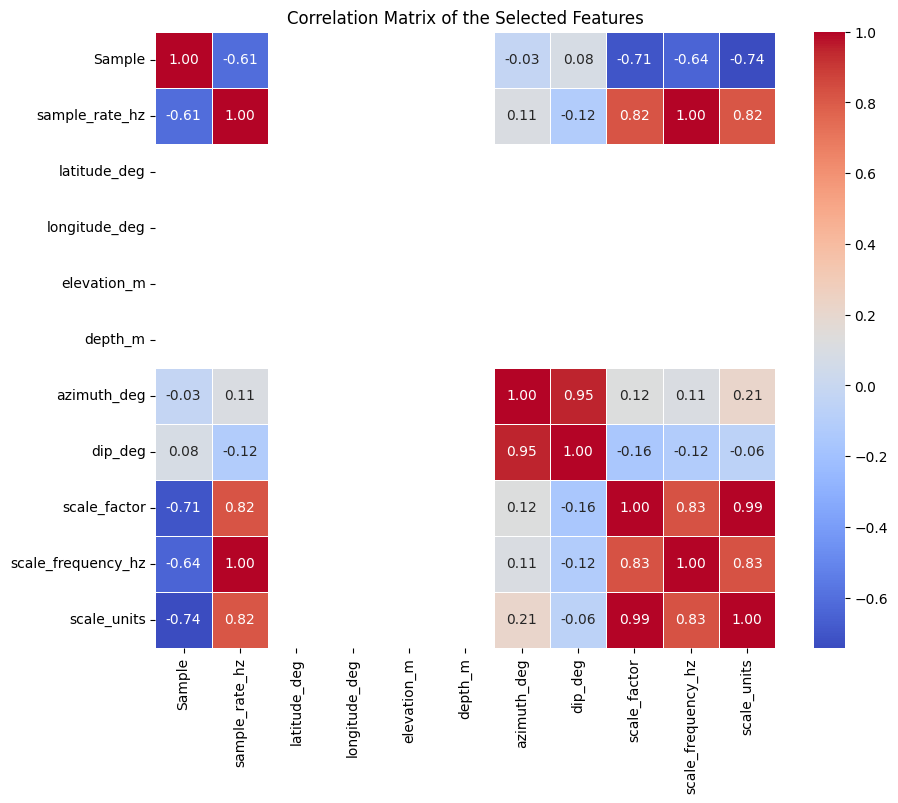

In [32]:

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of the Selected Features")
plt.show()

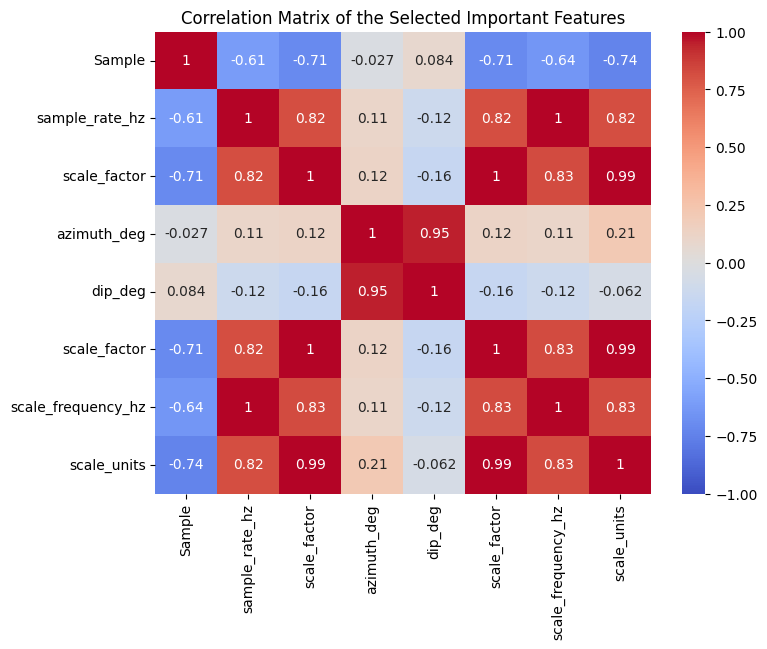

In [34]:
# Dropping the less important columns and creating a correlation map for the rest features
important_columns = ['Sample', 'sample_rate_hz', 'scale_factor', 'azimuth_deg', 'dip_deg','scale_factor','scale_frequency_hz','scale_units']

# Dropping the unimportant columns
df = df[important_columns]

correlation_matrix_important = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_important, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of the Selected Important Features')
plt.show()


In [35]:
df

,Sample,sample_rate_hz,scale_factor,azimuth_deg,dip_deg,scale_factor,scale_frequency_hz,scale_units
0,5443060,1.0,9.454070e+08,135.1,-29.4,9.454070e+08,0.005,1
1,5442664,1.0,9.454070e+08,135.1,-29.4,9.454070e+08,0.005,1
2,5442460,1.0,9.454070e+08,135.1,-29.4,9.454070e+08,0.005,1
3,5442096,1.0,9.454070e+08,135.1,-29.4,9.454070e+08,0.005,1
4,5441764,1.0,9.454070e+08,135.1,-29.4,9.454070e+08,0.005,1
...,...,...,...,...,...,...,...,...
168128,-7216,2.0,2.137420e+10,350.0,-0.8,2.137420e+10,0.100,2
168129,-7257,2.0,2.137420e+10,350.0,-0.8,2.137420e+10,0.100,2
168130,-7275,2.0,2.137420e+10,350.0,-0.8,2.137420e+10,0.100,2
168131,-7294,2.0,2.137420e+10,350.0,-0.8,2.137420e+10,0.100,2


In [38]:
#Let's scale the column
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Sample','sample_rate_hz','scale_factor','azimuth_deg','dip_deg','scale_factor','scale_frequency_hz','scale_units']

scaler = StandardScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


/tmp/ipykernel_30/526514229.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [39]:
df

,Sample,sample_rate_hz,scale_factor,azimuth_deg,dip_deg,scale_factor,scale_frequency_hz,scale_units
0,8.394661,-4.619308,-5.304664,-0.936553,0.329812,-5.304664,-4.911723,-5.639720
1,8.394044,-4.619308,-5.304664,-0.936553,0.329812,-5.304664,-4.911723,-5.639720
2,8.393727,-4.619308,-5.304664,-0.936553,0.329812,-5.304664,-4.911723,-5.639720
3,8.393160,-4.619308,-5.304664,-0.936553,0.329812,-5.304664,-4.911723,-5.639720
4,8.392643,-4.619308,-5.304664,-0.936553,0.329812,-5.304664,-4.911723,-5.639720
...,...,...,...,...,...,...,...,...
168128,-0.089919,-4.570447,0.076115,1.002523,0.987176,0.076115,-4.421979,0.177314
168129,-0.089982,-4.570447,0.076115,1.002523,0.987176,0.076115,-4.421979,0.177314
168130,-0.090010,-4.570447,0.076115,1.002523,0.987176,0.076115,-4.421979,0.177314
168131,-0.090040,-4.570447,0.076115,1.002523,0.987176,0.076115,-4.421979,0.177314


In [48]:
df = df.loc[:, ~df.columns.duplicated()]
df

,Sample,sample_rate_hz,scale_factor,azimuth_deg,dip_deg,scale_frequency_hz,scale_units
0,8.394661,-4.619308,-5.304664,-0.936553,0.329812,-4.911723,-5.639720
1,8.394044,-4.619308,-5.304664,-0.936553,0.329812,-4.911723,-5.639720
2,8.393727,-4.619308,-5.304664,-0.936553,0.329812,-4.911723,-5.639720
3,8.393160,-4.619308,-5.304664,-0.936553,0.329812,-4.911723,-5.639720
4,8.392643,-4.619308,-5.304664,-0.936553,0.329812,-4.911723,-5.639720
...,...,...,...,...,...,...,...
168128,-0.089919,-4.570447,0.076115,1.002523,0.987176,-4.421979,0.177314
168129,-0.089982,-4.570447,0.076115,1.002523,0.987176,-4.421979,0.177314
168130,-0.090010,-4.570447,0.076115,1.002523,0.987176,-4.421979,0.177314
168131,-0.090040,-4.570447,0.076115,1.002523,0.987176,-4.421979,0.177314


# # **#NOW LET'S TRAIN THE MODEL**

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
def create_labels(df):
    # Using the scaled values to detect anomalous patterns
    # We'll consider it an event if multiple features show unusual values
    condition = (
        (df['scale_factor'].abs() > 2.0) &  # More than 2 standard deviations
        (df['scale_frequency_hz'].abs() > 2.0) &
        (df['azimuth_deg'].abs() > 1.5)
    )
    return condition.astype(int)


In [56]:
def prepare_data(df, labels):
    # Separate features and target
    X = df.values  # Convert DataFrame to numpy array
    y = labels
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

In [57]:
def train_model(X_train, y_train):
    # Using Random Forest as it handles non-linear relationships well
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight='balanced'
    )
    
    model.fit(X_train, y_train)
    return model


In [58]:
def evaluate_model(model, X_test, y_test, feature_names):
    predictions = model.predict(X_test)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.title('Feature Importances')
    plt.bar(range(X_test.shape[1]), importances[indices])
    plt.xticks(range(X_test.shape[1]), [feature_names[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()

In [59]:
def predict_seismic_event(model, new_data):
    # Make prediction
    prediction = model.predict(new_data)
    probabilities = model.predict_proba(new_data)
    
    return prediction, probabilities

Class distribution:
0    0.985131
1    0.014869
Name: proportion, dtype: float64


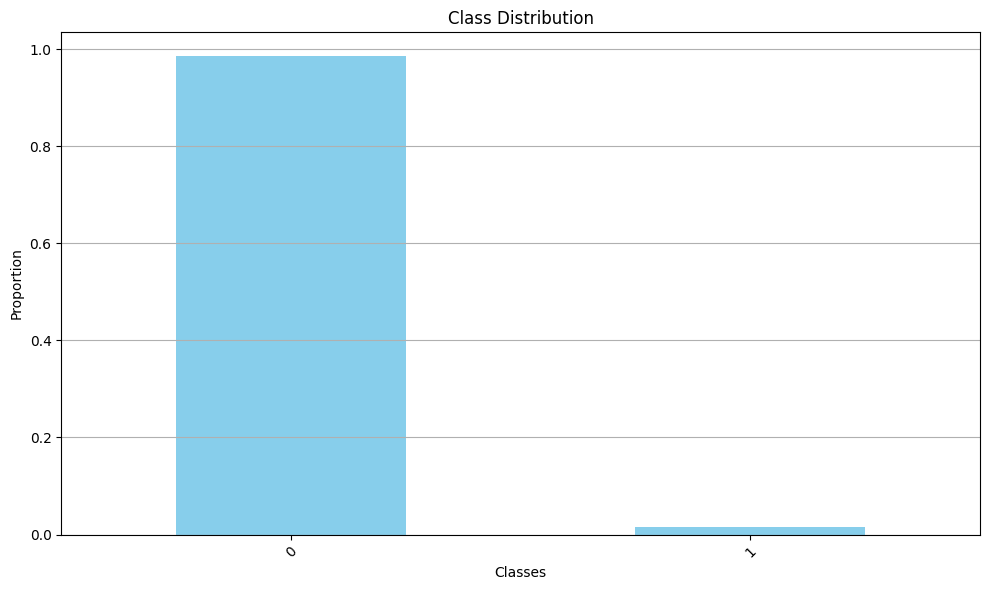

In [61]:
labels = create_labels(df)

# Print class distribution
print("Class distribution:")
class_distribution = labels.value_counts(normalize=True)
print(class_distribution)

# Plot the class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [62]:
#WRITE LINE HERE TO BALANCE THIS USING SMOTE
X_train, X_test, y_train, y_test = prepare_data(df, labels)

from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are defined as your features and labels
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [64]:
y_train_balanced_series = pd.Series(y_train_balanced)
print(y_train_balanced_series.value_counts())

0    132506
1    132506
Name: count, dtype: int64



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33127
           1       1.00      1.00      1.00       500

    accuracy                           1.00     33627
   macro avg       1.00      1.00      1.00     33627
weighted avg       1.00      1.00      1.00     33627



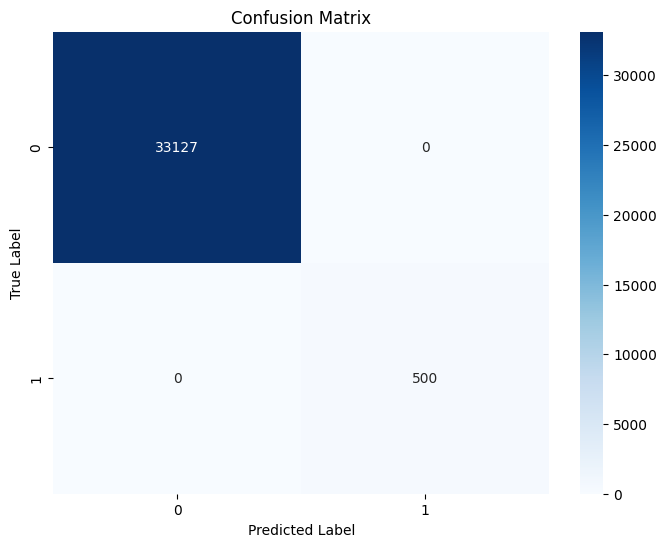

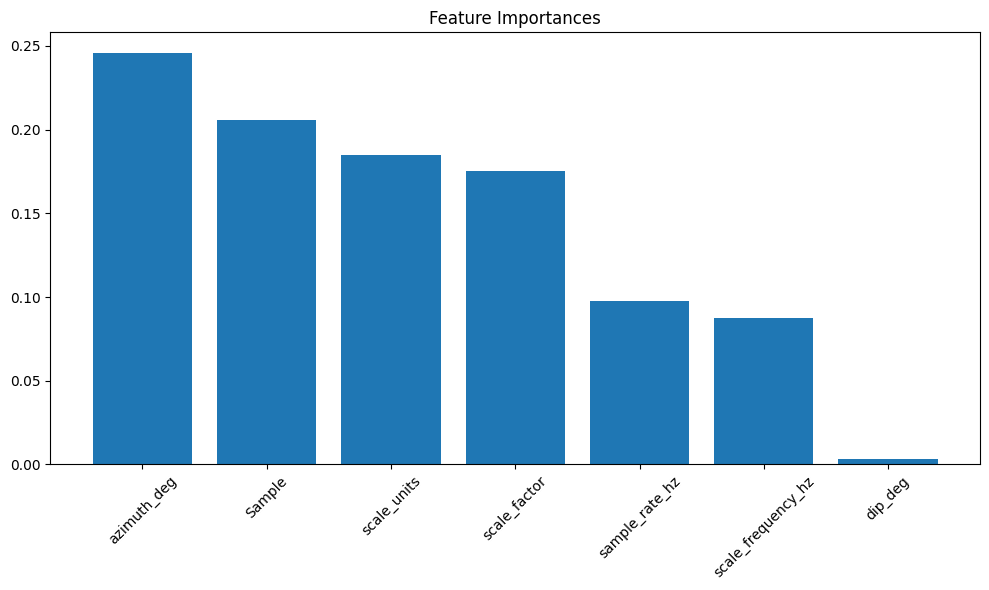


Predictions for new data:
Event detected (1) or not (0): [0 0 0 0 0]
Probability of event: [0. 0. 0. 0. 0.]


In [65]:
if __name__ == "__main__":
    # Your scaled data is already in df
    # Get feature names for later use
    feature_names = df.columns.tolist()
    

    # Train the model
    model = train_model(X_train_balanced, y_train_balanced)
    
    # Evaluate the model
    evaluate_model(model, X_test, y_test, feature_names)
    
    # Example of how to use the model for predictions on new data
    # Assuming new_data is already scaled similarly to training data
    new_data = df.head().values  # Just as an example
    prediction, probabilities = predict_seismic_event(model, new_data)
    print("\nPredictions for new data:")
    print("Event detected (1) or not (0):", prediction)
    print("Probability of event:", probabilities[:, 1])

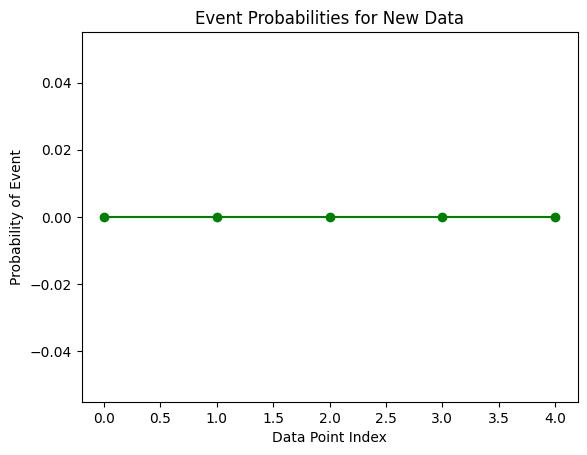

In [66]:
x = np.arange(len(probabilities[:, 1]))
y = probabilities[:, 1]

# Create line plot
plt.plot(x, y, marker='o', color='green')

# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Probability of Event')
plt.title('Event Probabilities for New Data')

# Show plot
plt.show()

# ****NOW LET'S TRY THE MODEL ON UNKNOWN DATA

In [73]:
def predict_new_data(model, test_file):
    df=pd.read_csv(test_file)
    df=df[['Sample', 'sample_rate_hz', 'latitude_deg', 'longitude_deg', 'elevation_m', 'depth_m', 'azimuth_deg', 'dip_deg', 'scale_factor', 'scale_frequency_hz', 'scale_units']]
    
    scale_unit_mapping = {
    'm/s**2': 1,  
    'm/s': 2,     
    }
    
    df['scale_units'] = df['scale_units'].map(scale_unit_mapping)
    
    df=df[['Sample', 'sample_rate_hz', 'scale_factor', 'azimuth_deg', 'dip_deg','scale_factor','scale_frequency_hz','scale_units']]
    
    scaler = StandardScaler()
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    df = df.loc[:, ~df.columns.duplicated()]

    
    new_data_array = np.array(df)

    prediction, probabilities = predict_seismic_event(model, new_data_array)
    return prediction, probabilities

In [76]:
prediction, probabilities=predict_new_data(model,'/kaggle/input/test-file/2020_output.csv')

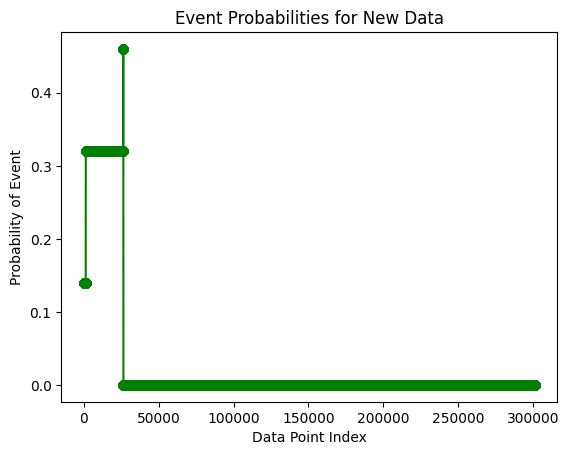

In [77]:
x = np.arange(len(probabilities[:, 1]))
y = probabilities[:, 1]

# Create line plot
plt.plot(x, y, marker='o', color='green')

# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Probability of Event')
plt.title('Event Probabilities for New Data')

# Show plot
plt.show()